Evaluate neuroverse3D on subtasks 


In [1]:
cases_dir = "/nfs/data/nii/data1/Analysis/camaret___in_context_segmentation/ANALYSIS_20251122/results"
task_name = "MR_BraTS" 
import os
cases = os.listdir(cases_dir)
cases = [c for c in cases if c.startswith(task_name)]
print(cases)

['MR_BraTS-T2f_bratsgli_0546_gt.nii.gz', 'MR_BraTS-T2f_bratsgli_0006_img.nii.gz', 'MR_BraTS-T2f_bratsgli_1262_img.nii.gz', 'MR_BraTS-T2f_bratsgli_0070_gt.nii.gz', 'MR_BraTS-T2f_bratsgli_0006_gt.nii.gz', 'MR_BraTS-T2f_bratsgli_1096_gt.nii.gz', 'MR_BraTS-T2w_bratsgli_0321_gt.nii.gz', 'MR_BraTS-T2f_bratsgli_0703_img.nii.gz', 'MR_BraTS-T2w_bratsgli_0771_gt.nii.gz', 'MR_BraTS-T2f_bratsgli_0070_img.nii.gz', 'MR_BraTS-T2w_bratsgli_0771_img.nii.gz', 'MR_BraTS-T2f_bratsgli_1033_img.nii.gz', 'MR_BraTS-T2f_bratsgli_0009_gt.nii.gz', 'MR_BraTS-T2f_bratsgli_0546_img.nii.gz', 'MR_BraTS-T2f_bratsgli_0703_gt.nii.gz', 'MR_BraTS-T2f_bratsgli_0009_img.nii.gz', 'MR_BraTS-T2f_bratsgli_1096_img.nii.gz', 'MR_BraTS-T2f_bratsgli_1033_gt.nii.gz', 'MR_BraTS-T2f_bratsgli_1262_gt.nii.gz', 'MR_BraTS-T2f_bratsgli_0107_gt.nii.gz', 'MR_BraTS-T2w_bratsgli_0321_img.nii.gz', 'MR_BraTS-T2f_bratsgli_1172_gt.nii.gz', 'MR_BraTS-T2f_bratsgli_1172_img.nii.gz', 'MR_BraTS-T2f_bratsgli_0107_img.nii.gz']


In [5]:
# Extract case numbers
case_numbers = list(set([c.split('_')[-2] for c in cases]))
case_numbers.sort()

# Separate images and ground truths
img_cases = [c for c in cases if c.endswith('_img.nii.gz')]
gt_cases = [c for c in cases if c.endswith('_gt.nii.gz')]

print(f"Case numbers: {case_numbers}")
print(f"\nImages ({len(img_cases)}): {img_cases}")
print(f"\nGround truths ({len(gt_cases)}): {gt_cases}")

Case numbers: ['0006', '0009', '0070', '0107', '0321', '0546', '0703', '0771', '1033', '1096', '1172', '1262']

Images (12): ['MR_BraTS-T2f_bratsgli_0006_img.nii.gz', 'MR_BraTS-T2f_bratsgli_1262_img.nii.gz', 'MR_BraTS-T2f_bratsgli_0703_img.nii.gz', 'MR_BraTS-T2f_bratsgli_0070_img.nii.gz', 'MR_BraTS-T2w_bratsgli_0771_img.nii.gz', 'MR_BraTS-T2f_bratsgli_1033_img.nii.gz', 'MR_BraTS-T2f_bratsgli_0546_img.nii.gz', 'MR_BraTS-T2f_bratsgli_0009_img.nii.gz', 'MR_BraTS-T2f_bratsgli_1096_img.nii.gz', 'MR_BraTS-T2w_bratsgli_0321_img.nii.gz', 'MR_BraTS-T2f_bratsgli_1172_img.nii.gz', 'MR_BraTS-T2f_bratsgli_0107_img.nii.gz']

Ground truths (12): ['MR_BraTS-T2f_bratsgli_0546_gt.nii.gz', 'MR_BraTS-T2f_bratsgli_0070_gt.nii.gz', 'MR_BraTS-T2f_bratsgli_0006_gt.nii.gz', 'MR_BraTS-T2f_bratsgli_1096_gt.nii.gz', 'MR_BraTS-T2w_bratsgli_0321_gt.nii.gz', 'MR_BraTS-T2w_bratsgli_0771_gt.nii.gz', 'MR_BraTS-T2f_bratsgli_0009_gt.nii.gz', 'MR_BraTS-T2f_bratsgli_0703_gt.nii.gz', 'MR_BraTS-T2f_bratsgli_1033_gt.nii.gz', 

Case 0006: Image shape: (51, 218, 182), GT shape: (51, 218, 182)
classes in GT: [0. 1. 2. 3.]


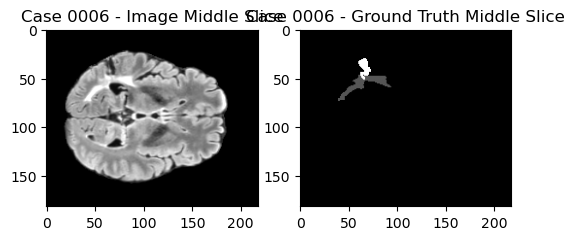

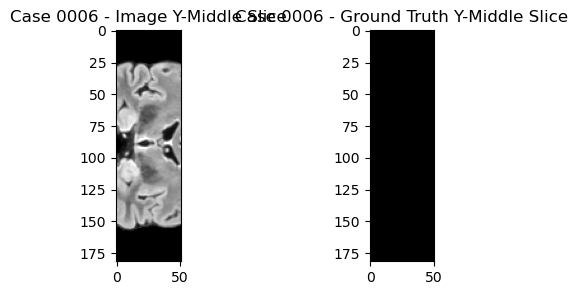

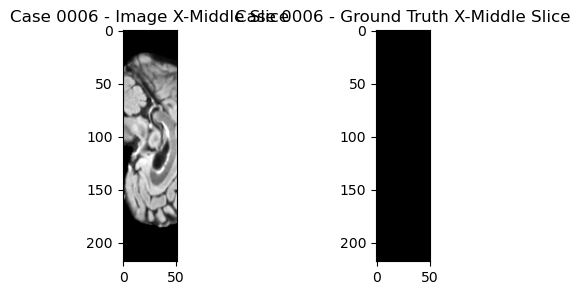

Case 0009: Image shape: (90, 218, 182), GT shape: (90, 218, 182)
classes in GT: [0. 1. 2. 3. 4.]


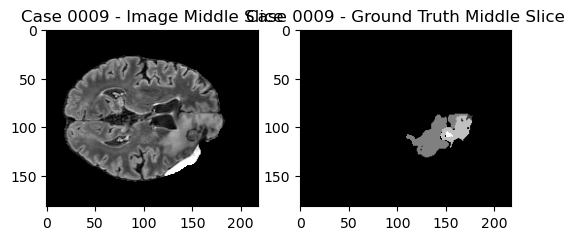

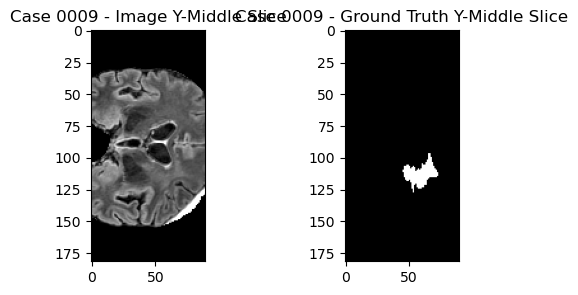

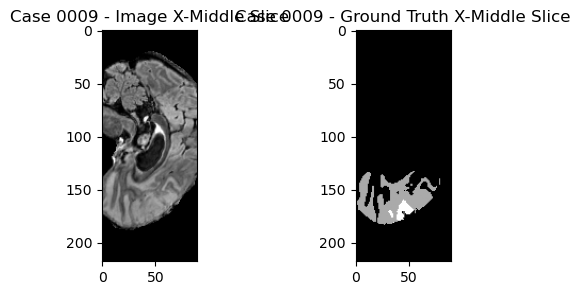

Case 0070: Image shape: (38, 218, 182), GT shape: (38, 218, 182)
classes in GT: [0. 1. 2.]


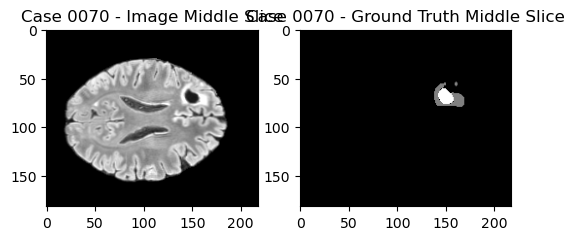

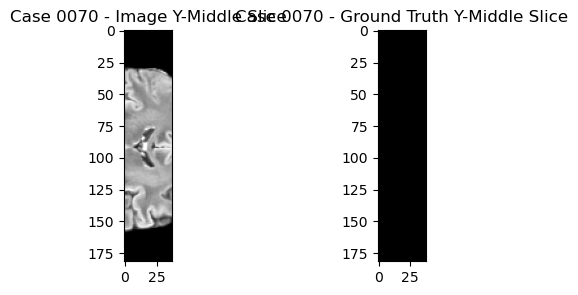

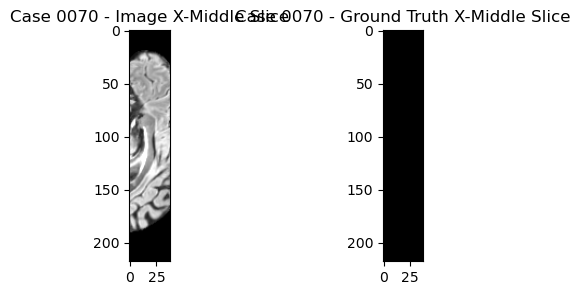

In [22]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# plot cases 
for case_num in case_numbers:
    img_file = [f for f in img_cases if case_num in f][0]
    gt_file = [f for f in gt_cases if case_num in f][0]

    img_nii = nib.load(os.path.join(cases_dir, img_file))
    gt_nii = nib.load(os.path.join(cases_dir, gt_file))

    img_data = img_nii.get_fdata()
    gt_data = gt_nii.get_fdata()

    print(f"Case {case_num}: Image shape: {img_data.shape}, GT shape: {gt_data.shape}")
    print(f"classes in GT: {np.unique(gt_data)}")

    # transpose to (H, W, D)
    img_data = np.transpose(img_data, (2, 1, 0))
    gt_data = np.transpose(gt_data, (2, 1, 0))

    # Plot z-middle slice of image and ground truth
    mid_slice = img_data.shape[2] // 2
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(img_data[:, :, mid_slice], cmap='gray')
    plt.title(f'Case {case_num} - Image Middle Slice')
    plt.subplot(1, 2, 2)
    plt.imshow(gt_data[:, :, mid_slice], cmap='gray')
    plt.title(f'Case {case_num} - Ground Truth Middle Slice')
    plt.show()  
    
    # Plot y-middle slice of image and ground truth
    mid_slice_y = img_data.shape[1] // 2
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(img_data[:, mid_slice_y, :], cmap='gray')
    plt.title(f'Case {case_num} - Image Y-Middle Slice')
    plt.subplot(1, 2, 2)
    plt.imshow(gt_data[:, mid_slice_y, :], cmap='gray')
    plt.title(f'Case {case_num} - Ground Truth Y-Middle Slice')
    plt.show()

    # Plot x-middle slice of image and ground truth
    mid_slice_x = img_data.shape[0] // 2
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(img_data[mid_slice_x, :, :], cmap='gray')
    plt.title(f'Case {case_num} - Image X-Middle Slice')
    plt.subplot(1, 2, 2)
    plt.imshow(gt_data[mid_slice_x, :, :], cmap='gray')
    plt.title(f'Case {case_num} - Ground Truth X-Middle Slice')
    plt.show()




classes in GT after thresholding: [0. 1.]


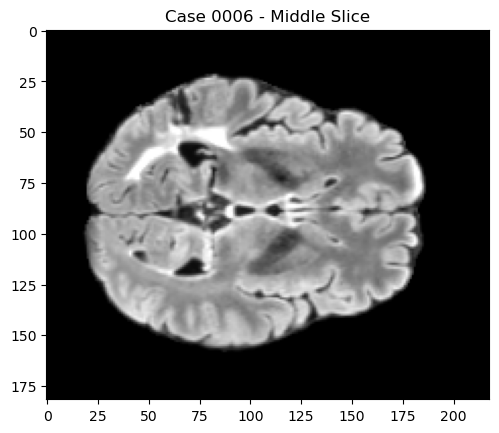

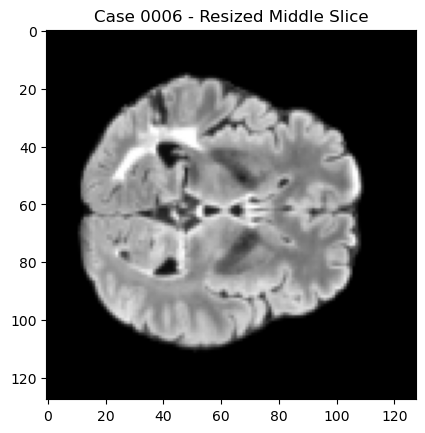

classes in GT after thresholding: [0. 1.]


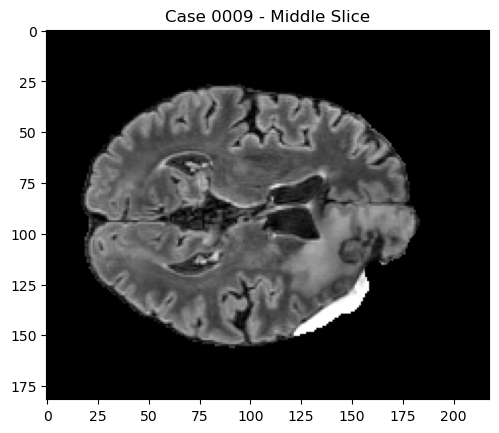

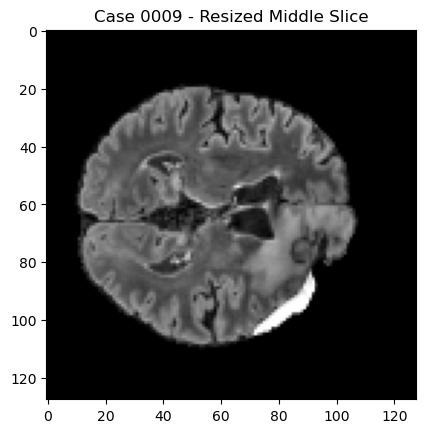

classes in GT after thresholding: [0. 1.]


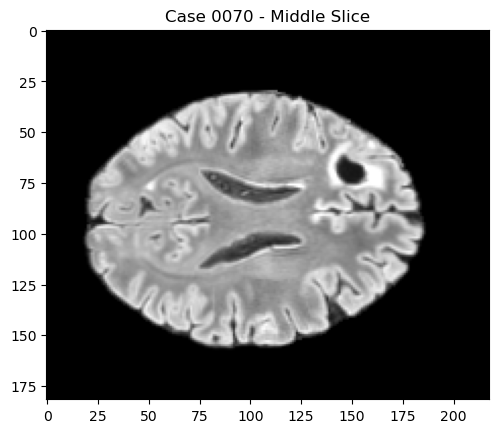

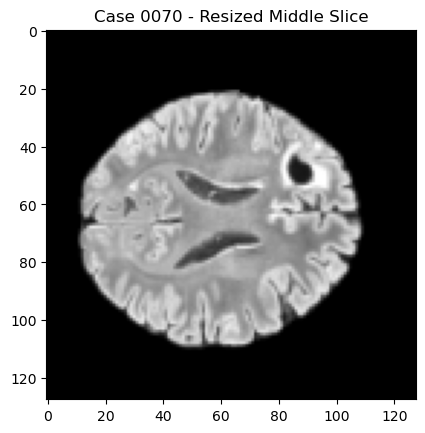

Shape of images: (3, 1, 128, 128, 128)
Shape of labels: (3, 1, 128, 128, 128)


In [23]:
# resize to 128x128x128 and store in arrays

from scipy.ndimage import zoom

case_numbers = ['0006', '0009', '0070']

# Initialize arrays
images = np.zeros((3, 1, 128, 128, 128), dtype=np.float32)
labels = np.zeros((3, 1, 128, 128, 128), dtype=np.float32)

# Load and resize each case
for idx, case_num in enumerate(case_numbers):
    # Find matching files
    img_file = [f for f in img_cases if case_num in f][0]
    gt_file = [f for f in gt_cases if case_num in f][0]
    
    # Load nifti files
    img_nii = nib.load(os.path.join(cases_dir, img_file))
    gt_nii = nib.load(os.path.join(cases_dir, gt_file))
    
    img_data = img_nii.get_fdata()
    gt_data = gt_nii.get_fdata()

    img_data = np.transpose(img_data, (2, 1, 0))
    gt_data = np.transpose(gt_data, (2, 1, 0))

    # set all classes >1 to 1 in gt_data
    gt_data[gt_data > 1] = 1

    print(f"classes in GT after thresholding: {np.unique(gt_data)}")

    # Plot a middle slice for verification
    mid_slice = img_data.shape[2] // 2
    plt.imshow(img_data[:, :, mid_slice], cmap='gray')
    plt.title(f'Case {case_num} - Middle Slice')
    plt.show()
    
    # Calculate zoom factors
    zoom_factors = [128 / s for s in img_data.shape]
    
    # Resize to (128, 128, 128)
    img_resized = zoom(img_data, zoom_factors, order=1)
    gt_resized = zoom(gt_data, zoom_factors, order=0)

    # plot resized middle slice for verification
    mid_slice_resized = img_resized.shape[2] // 2
    plt.imshow(img_resized[:, :, mid_slice_resized], cmap='gray')
    plt.title(f'Case {case_num} - Resized Middle Slice')
    plt.show()
    
    # Store in arrays
    images[idx, 0] = img_resized
    labels[idx, 0] = gt_resized

print('Shape of images:', images.shape)
print('Shape of labels:', labels.shape)


In [16]:
import sys
sys.path.append("/software/notebooks/camaret/repos/Neuroverse3D")
from neuroverse3D.lightning_model import LightningModel
from utils.dataloading import *
from utils.task_synthesis import *
device = "cuda:0"
checkpoint_path = '/software/notebooks/camaret/repos/Neuroverse3D/checkpoint/neuroverse3D.ckpt'
checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
hparams = checkpoint['hyper_parameters']
# load model
import warnings
warnings.filterwarnings('ignore')
model = LightningModel.load_from_checkpoint(checkpoint_path, map_location=torch.device(device))
print('Load checkpoint from:', checkpoint_path)
total_params = sum(p.numel() for p in model.parameters())
print("Total number of parameters: ", total_params)

Load checkpoint from: /software/notebooks/camaret/repos/Neuroverse3D/checkpoint/neuroverse3D.ckpt
Total number of parameters:  70854913


In [24]:
target_in, context_in, target_out_raw, context_out_raw = structure_data(images, labels, index = 0, verbose = True)

Shape of target_in: (1, 1, 128, 128, 128) 
Shape of target_out: (1, 1, 128, 128, 128)
Shape of context_in: (1, 2, 1, 128, 128, 128) 
Shape of context_out: (1, 2, 1, 128, 128, 128)
The context size is: 2


Selected classes: 1


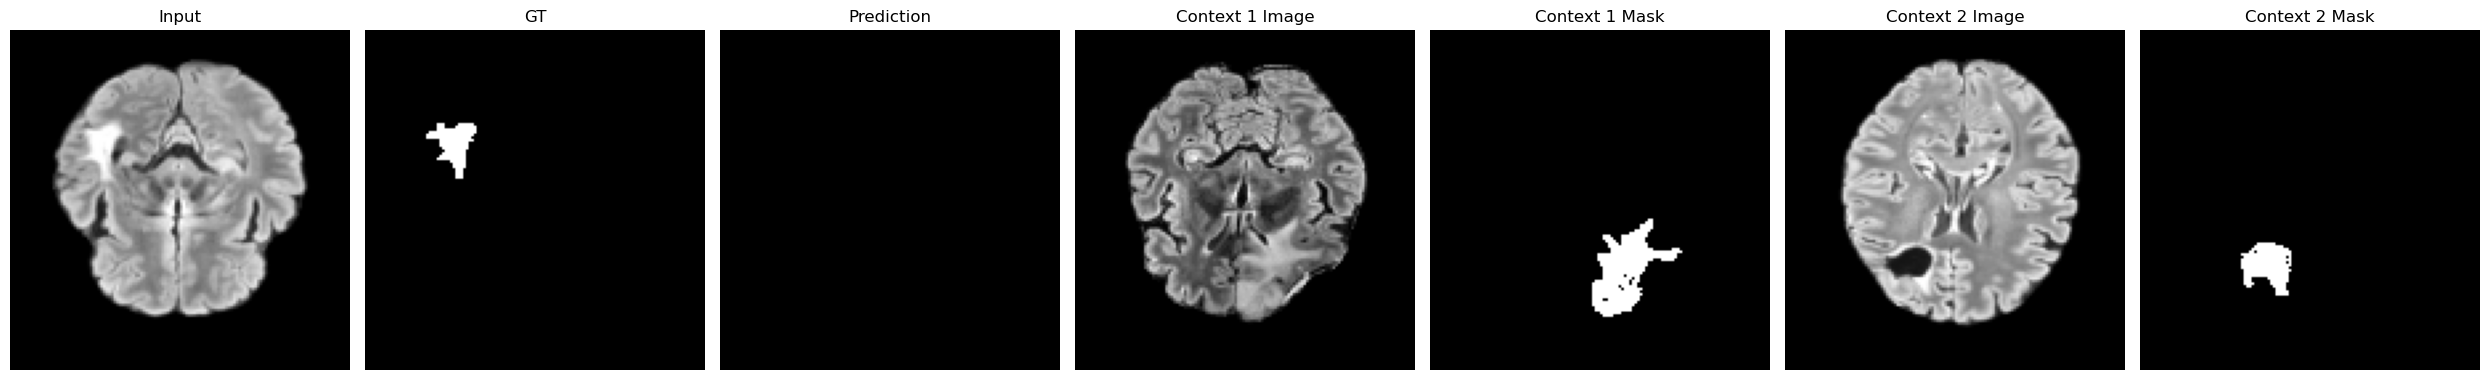

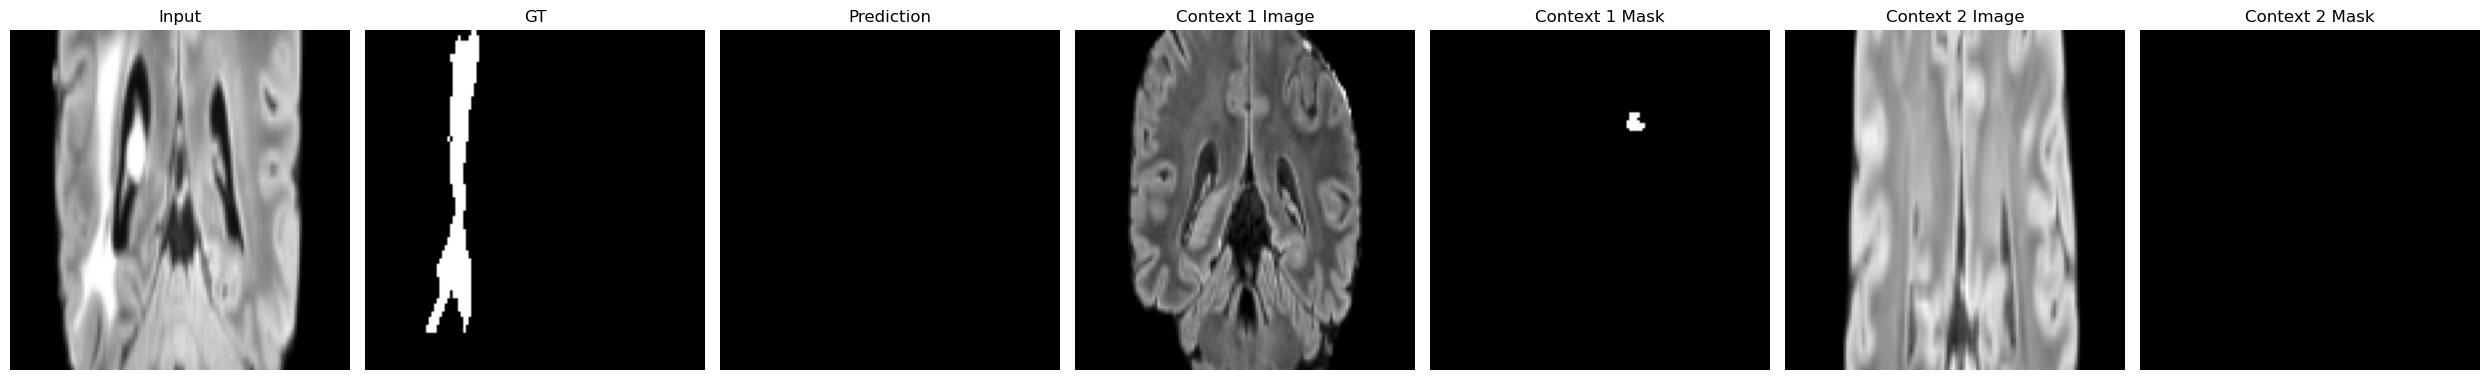

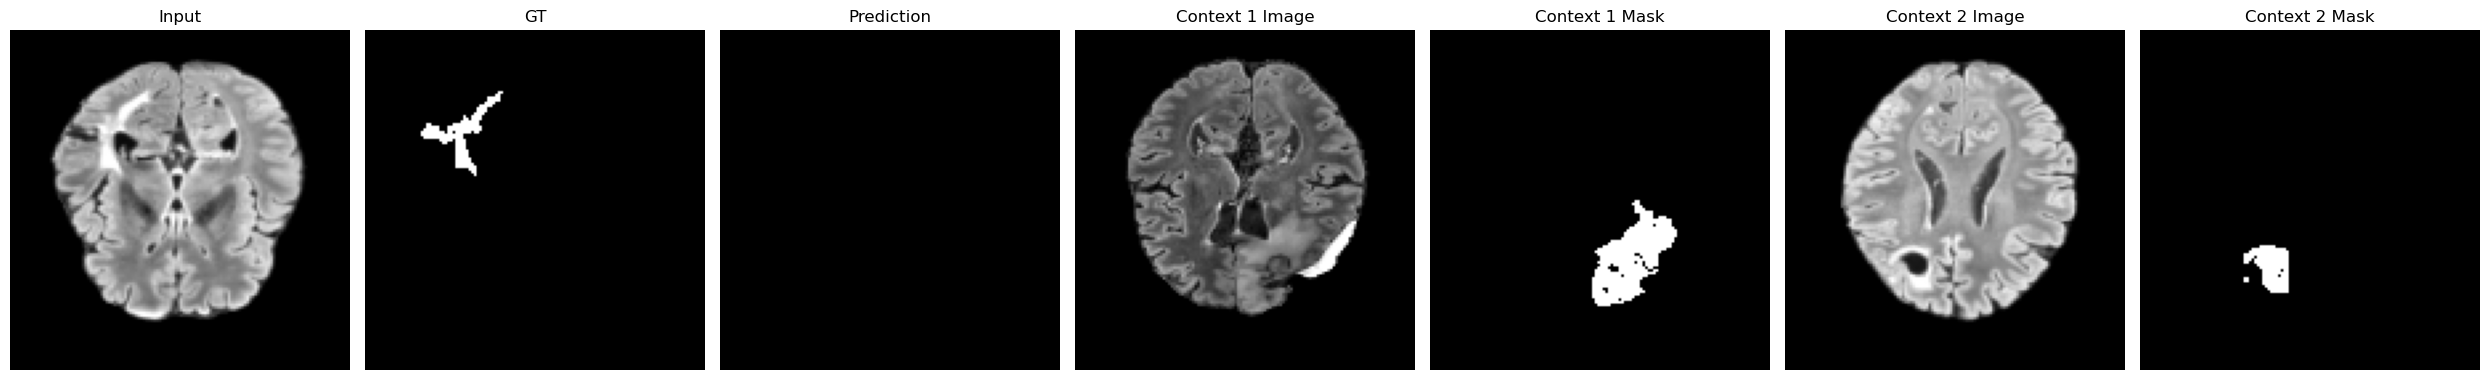

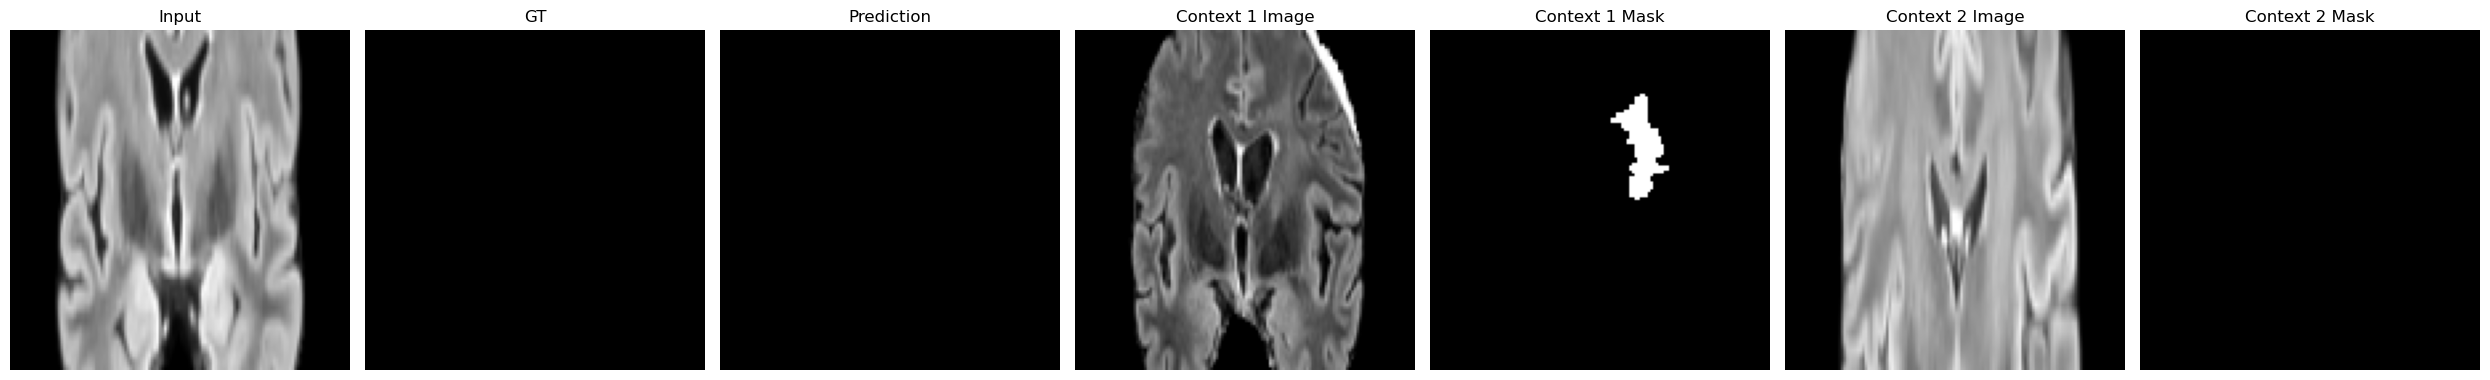

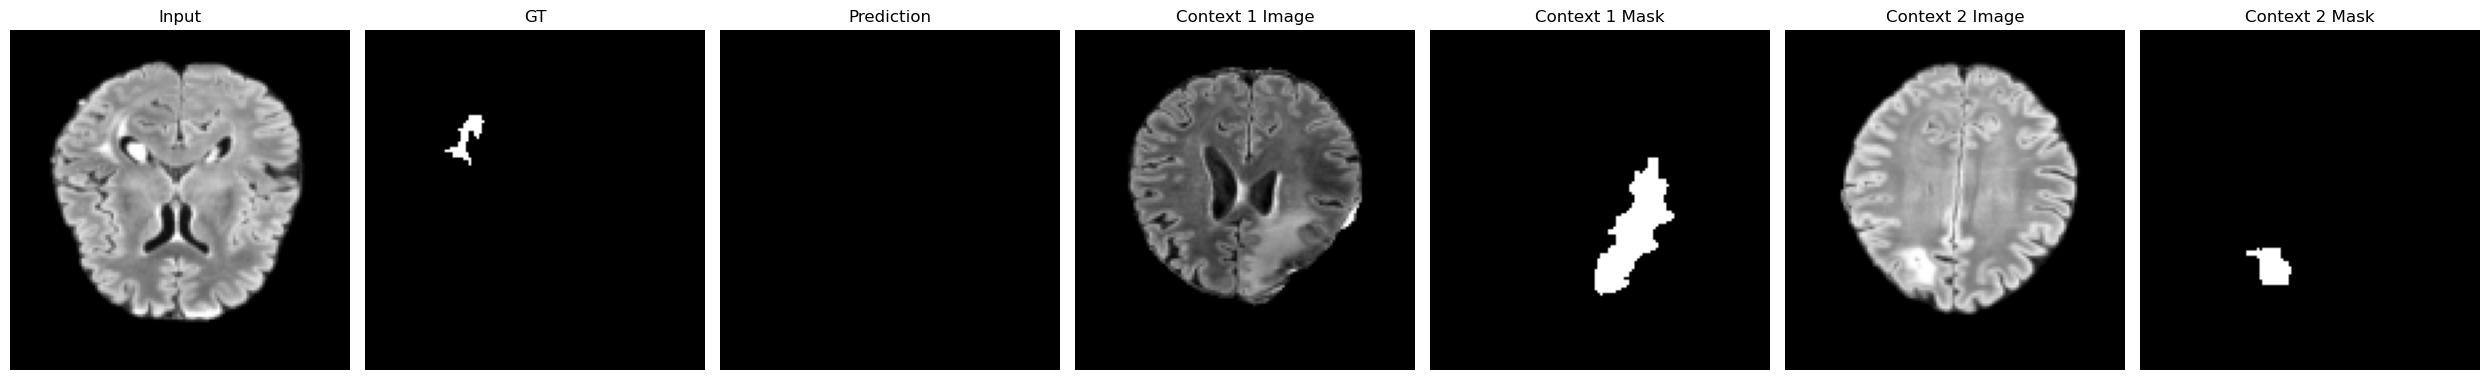

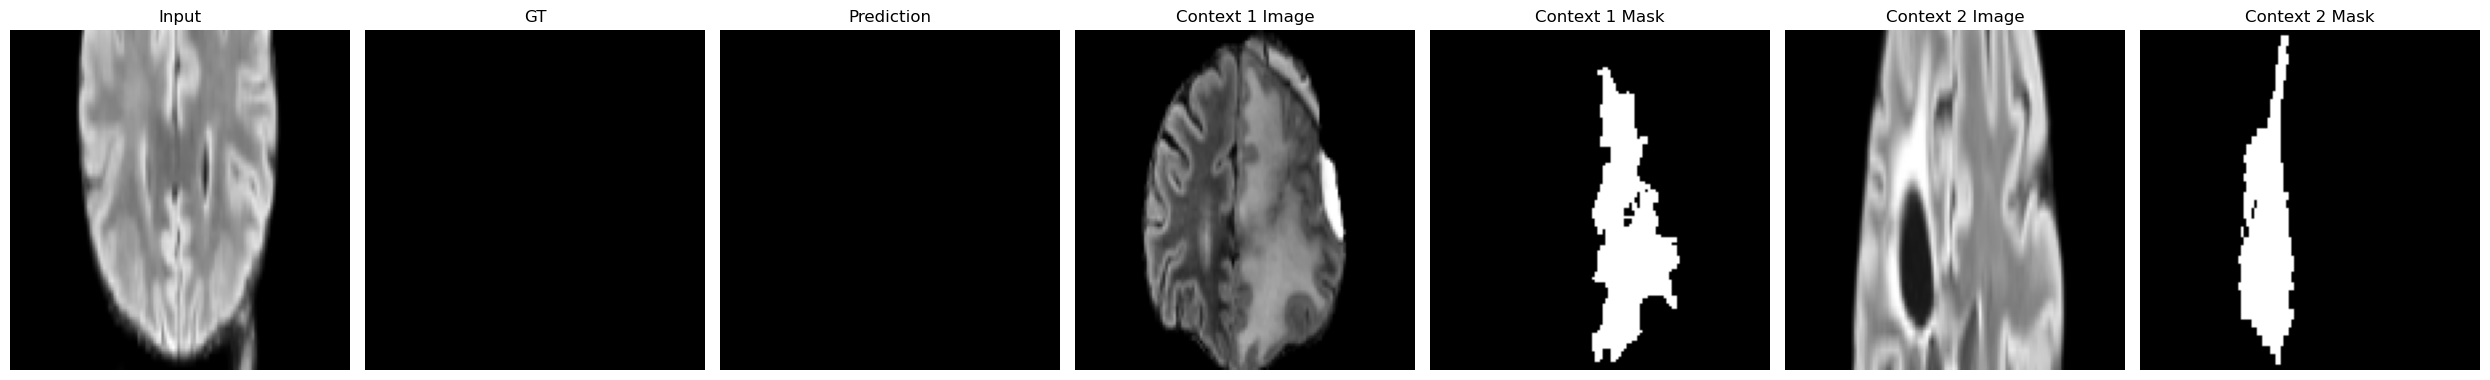

In [26]:
# Set random foreground
unique_masks = np.unique(target_out_raw) 

# Feel free to try different segmentation tasks. 
seg_class = 1 #np.random.choice(unique_masks, size=3, replace=False) # randomly select 3 classes
print('Selected classes:',seg_class)

# Set the foreground class to 1
context_out = np.isin(context_out_raw, seg_class).astype(np.float32)
target_out = np.isin(target_out_raw, seg_class).astype(np.float32)

# Normalization
target_out = normalize_3d_volume(torch.tensor(target_out).to(device))
target_in = normalize_3d_volume(torch.tensor(target_in).to(device))
context_in = normalize_3d_volume(torch.tensor(context_in))
context_out = normalize_3d_volume(torch.tensor(context_out))

# Run model
with torch.no_grad():
    mask = model.forward(target_in, context_in, context_out, gs = 2) # gs control the size of mini-context

for slice_ in [44,64,84]:
    plot_pred(target_in, target_out, context_in, context_out, mask, slice_=slice_)
    plot_pred2(target_in, target_out, context_in, context_out, mask, slice_=slice_)

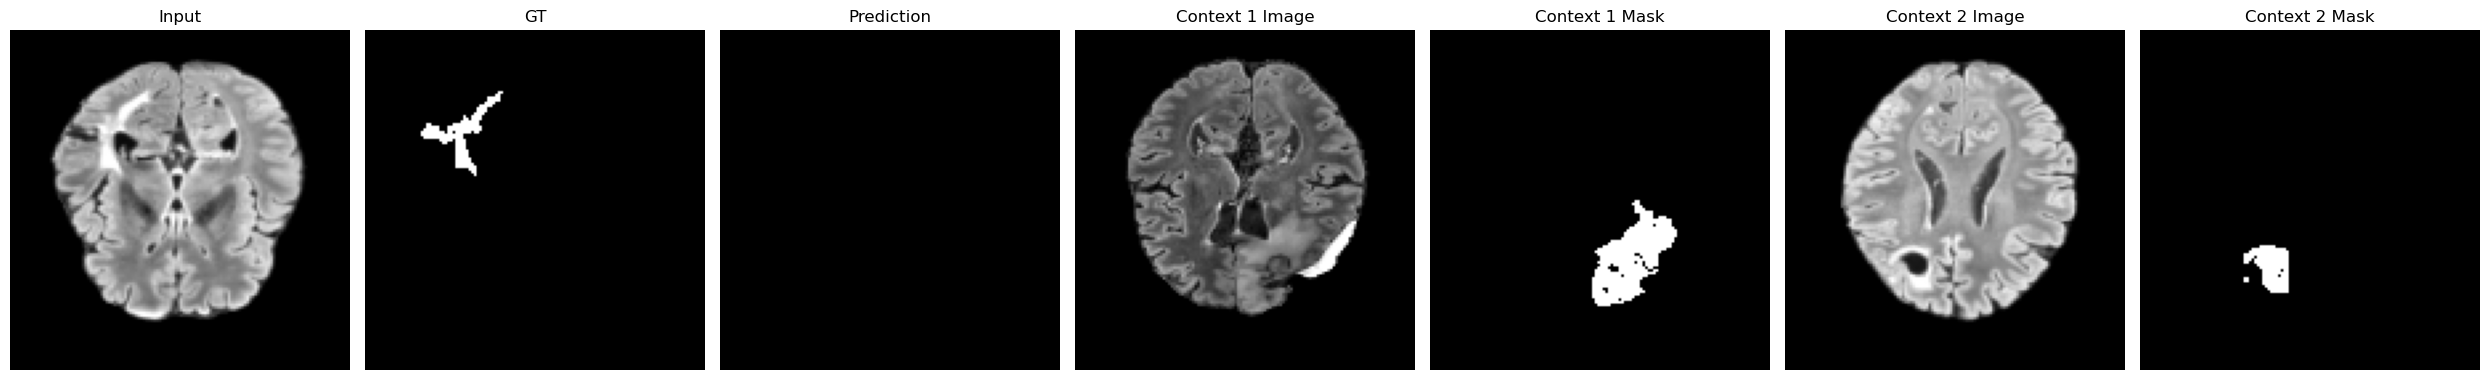

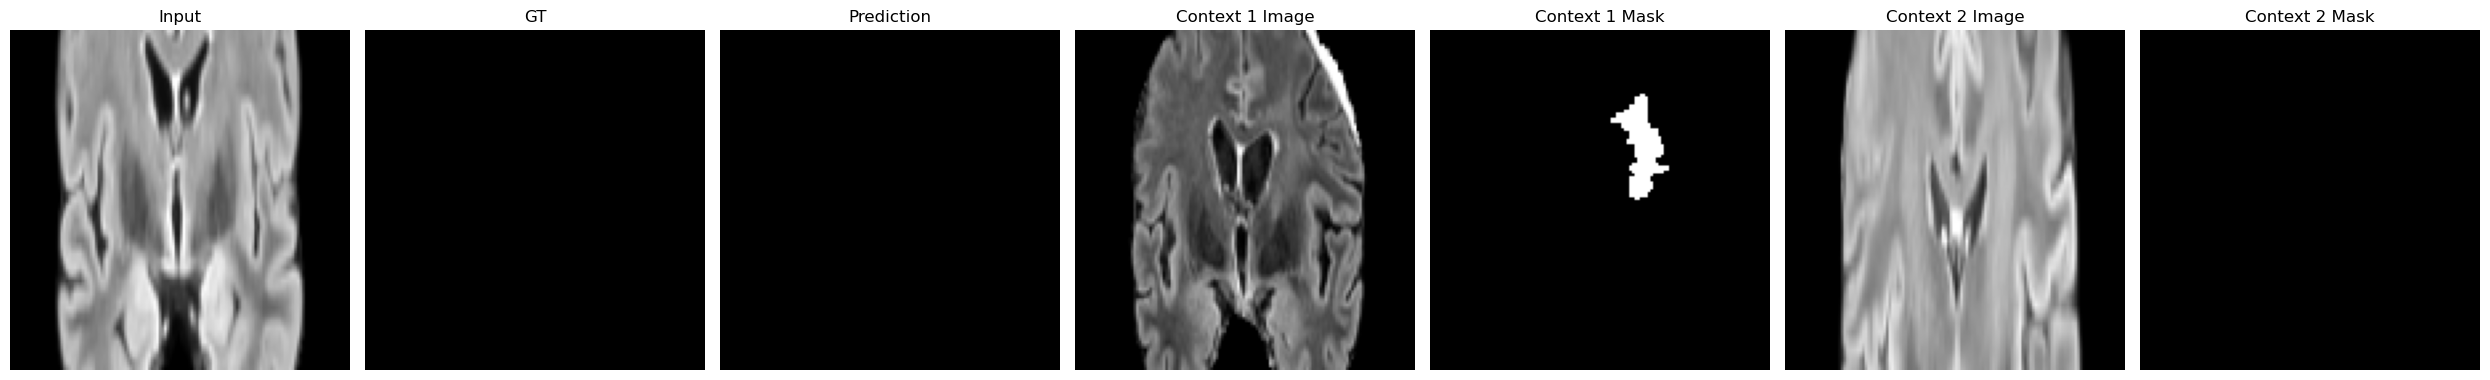

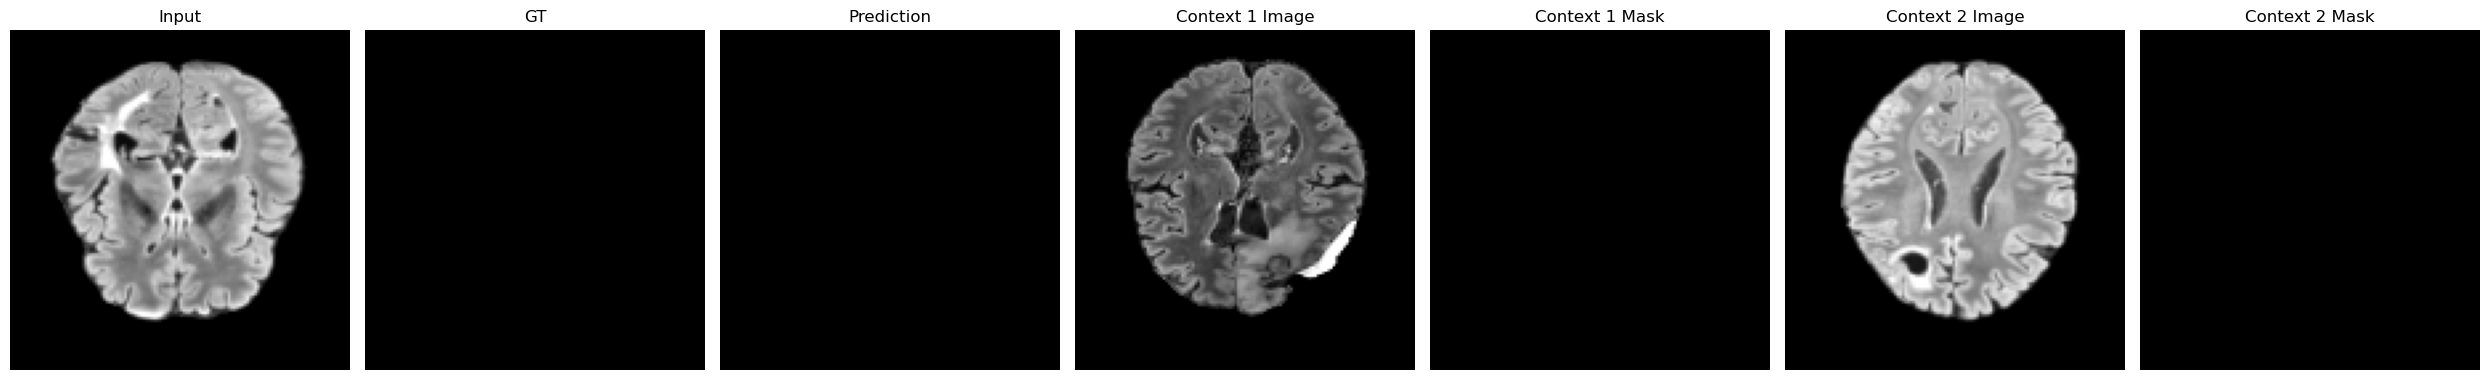

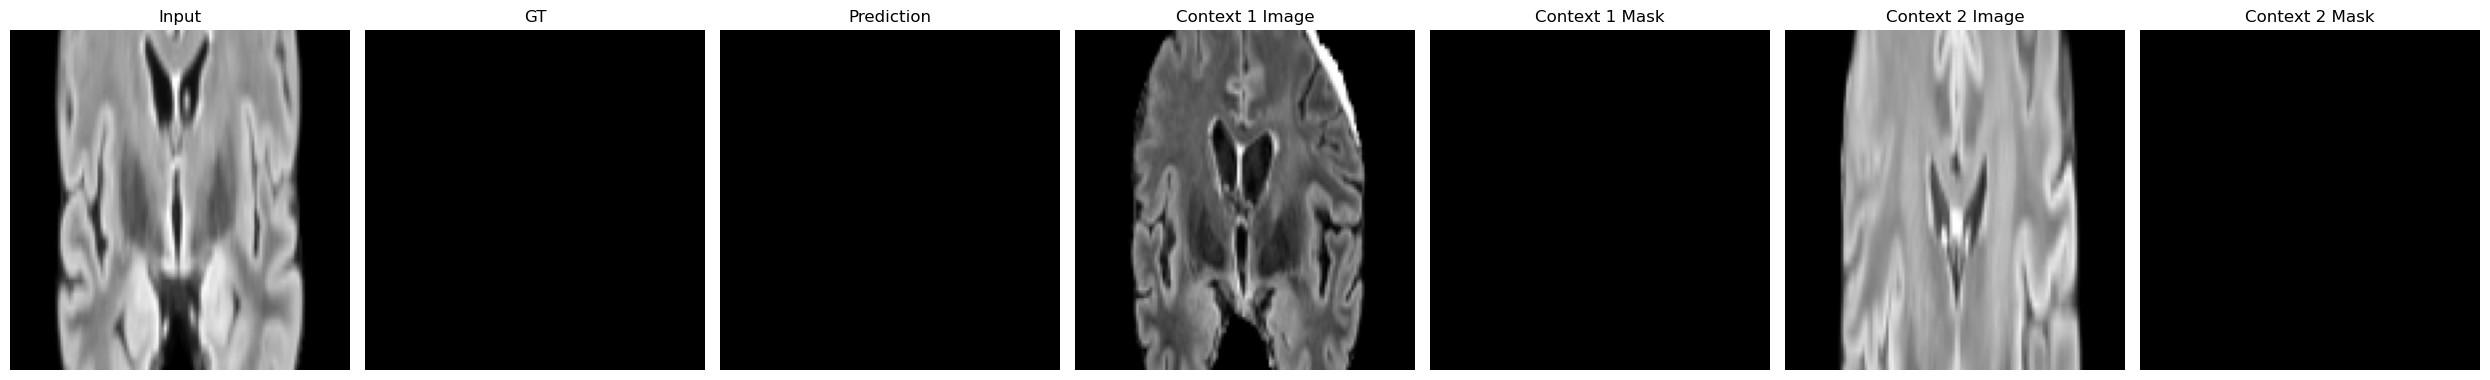

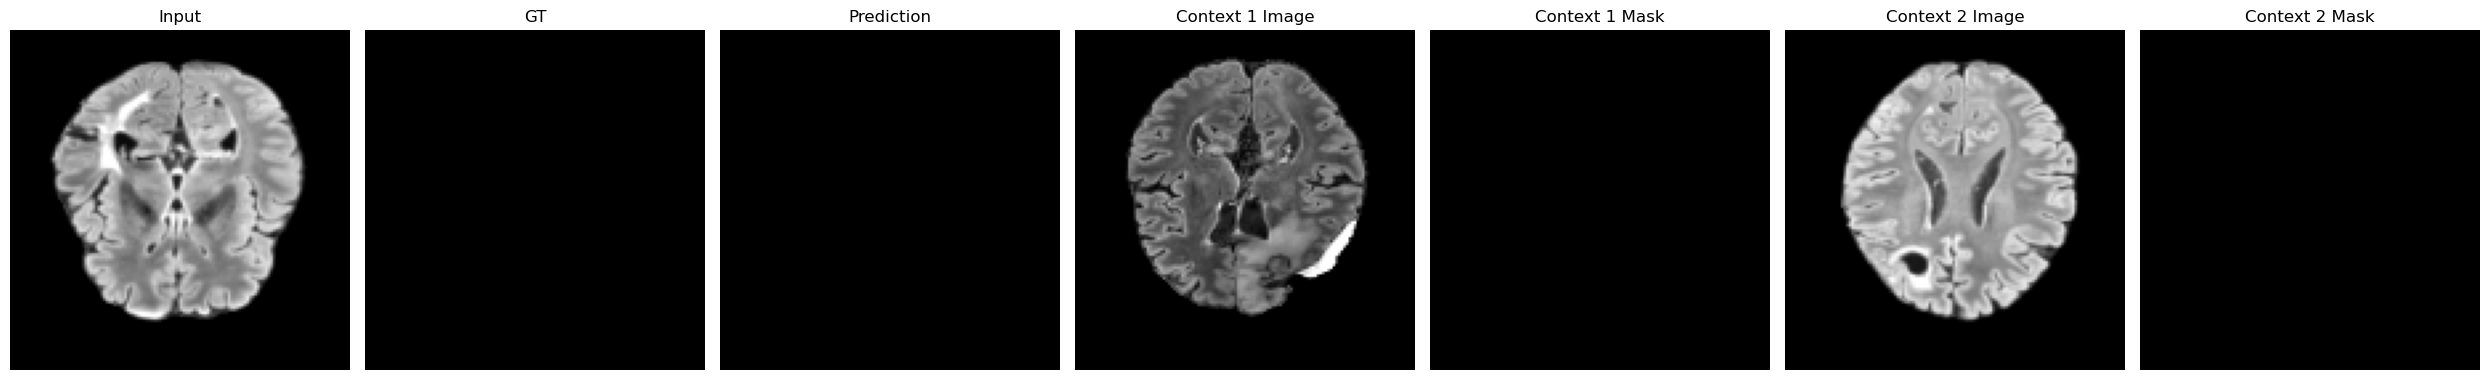

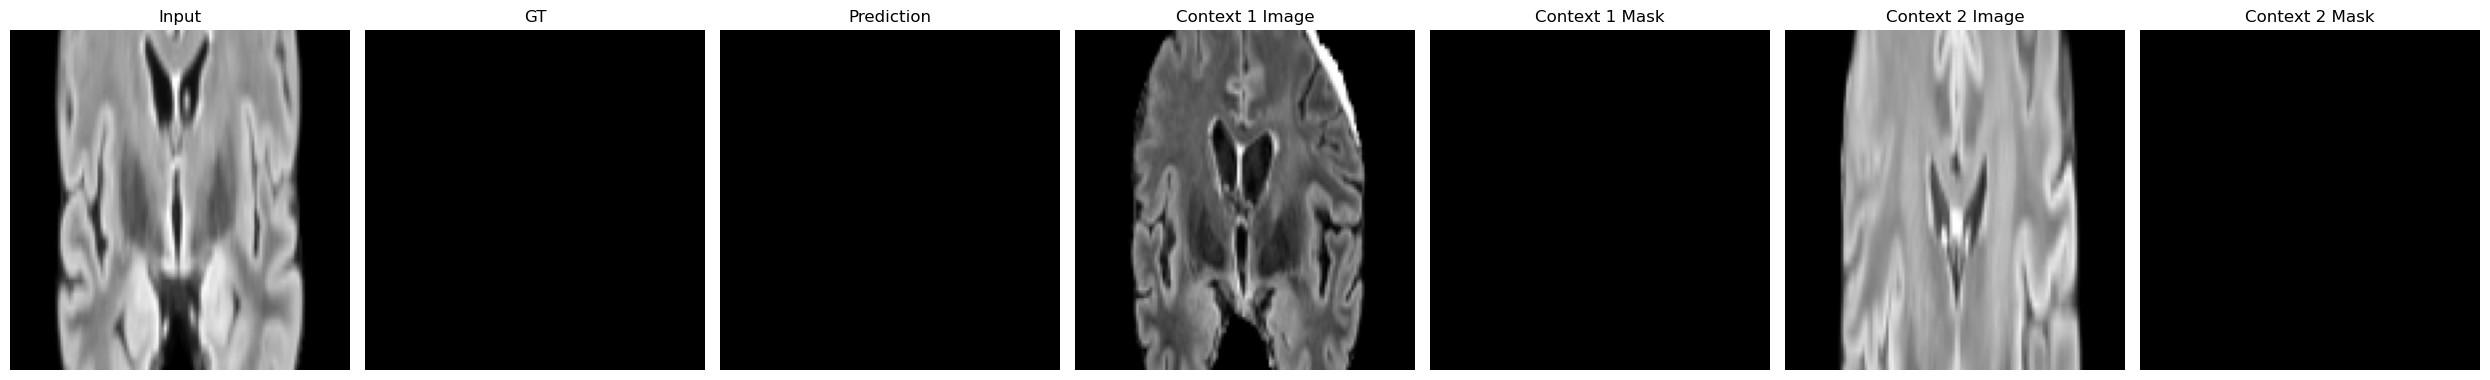

In [27]:
# Evaluation 
for seg_class in [[1,20],[2,21],[7,26]]: # Select foreground class. 
    # Set the foreground class to 1
    context_out = np.isin(context_out_raw, seg_class).astype(np.float32)
    target_out = np.isin(target_out_raw, seg_class).astype(np.float32)

    # Normalization
    target_out = normalize_3d_volume(torch.tensor(target_out).to(device))
    target_in = normalize_3d_volume(torch.tensor(target_in).to(device))
    context_in = normalize_3d_volume(torch.tensor(context_in)) # It is important to keep context in cpu to save memory, when the context size is large.
    context_out = normalize_3d_volume(torch.tensor(context_out))
    
    
    # Run model
    with torch.no_grad():
        mask = model.forward(target_in, context_in, context_out, gs = 2) # gs control the size of mini-context
        
    plot_pred(target_in, target_out, context_in, context_out, mask, slice_=64)
    plot_pred2(target_in, target_out, context_in, context_out, mask, slice_=64)